In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cc = load_breast_cancer()

In [4]:
cc.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(cc['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
df_feat = pd.DataFrame(cc['data'], columns=cc['feature_names'])

In [7]:
df_feat.head()
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
#cc['target'][:20]
#len(cc['target'])
df_feat_target = df_feat
df_feat_target['target'] = cc['target']

In [9]:
df_feat_target.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_feat
y = cc['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# Need a linear to plot this
modela = SVC(kernel='linear')
modela.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

ValueError: X.shape[1] = 2 should be equal to 31, the number of features at training time

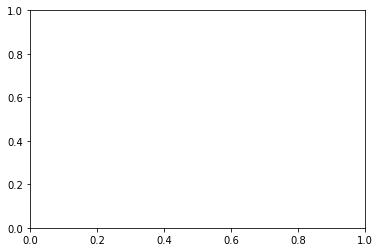

In [47]:
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

In [40]:
# Get the separating hyperplane
w = modela.coef_[0]
a = -w[0]/ w[1]
xx = np.linspace(5,30)
yy = a * xx - (modela.intercept_[0])/w[1]

# Plot the parallels to the separating hyperplane
# that pass through support vectors
b = modela.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = modela.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

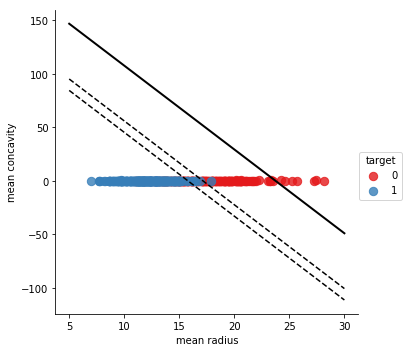

In [41]:
sns.lmplot('mean radius', 'mean concavity', 
           data=df_feat_target, 
           hue='target', 
           palette='Set1', 
           fit_reg=False, 
           scatter_kws={"s":70})

plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(modela.support_vectors_[:,0], modela.support_vectors_[:,1], s=80, facecolors='none')

In [17]:
predictions = model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[  0  67]
 [  0 121]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        67
          1       0.64      1.00      0.78       121

avg / total       0.41      0.64      0.50       188



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Problem
Model predicted no tumours in 0 class, all in class 1

our model needs parameters adjusting and parameters need normalizing

Do grid search (combinations) to find c or gamma values to use

##### C: Cost of misclassification. 
- Large C = low bias and high variance. Large C greatly penalises misclassification. 

##### Gamma: free parameter of Gaussian radial basis function. 
- Small gamma means a Gaussian with a large variance. 
- Large gamma gives high bias and low variance. Implying that SV doesnt have a widespread influence.

GridSearchCV takes in a dictionary that describes the parameters that should be tried and model to train
- Keys = parameters
- Values = list of settings to be tested

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [22]:
grid = GridSearchCV(SVC(), param_grid,verbose=3)

Run same loop with cross_validation to find the best parameter combination

Once it has the best combination

Run the whole data again with that combination to build a single new model

In [23]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .................. C=0.1, gamma=1, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................ C=0.1, gamma=0.1, score=0.6171875, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6220472440944882, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.001, score=0.6190476190476191, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ............. C=0.1, gamma=0.0001, score=0.8828125, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.8976377952755905, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.8888888888888888, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .................... C=1, gamma=1, score=0.6171875, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6220472440944882, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6190476190476191, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] .............. C=1000, gamma=0.001, score=0.921875, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ..... C=1000, gamma=0.001, score=0.905511811023622, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ..... C=1000, gamma=0.001, score=0.873015873015873, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............ C=1000, gamma=0.0001, score=0.9453125, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .... C=1000, gamma=0.0001, score=0.905511811023622, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9126984126984127, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
# Find best combination
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [25]:
# grab best estimator and score
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[ 63   4]
 [  3 118]]
             precision    recall  f1-score   support

          0       0.95      0.94      0.95        67
          1       0.97      0.98      0.97       121

avg / total       0.96      0.96      0.96       188



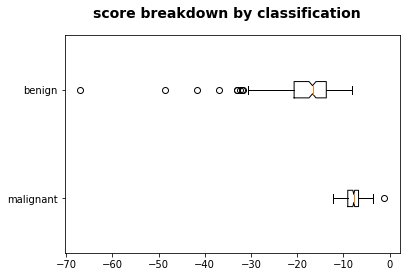

In [28]:
from sklearn import svm
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data                # training features
y = data.target              # training labels

lin_clf = svm.SVC(kernel='linear')
lin_clf.fit(X, y)

scores = np.dot(X, lin_clf.coef_.T)

b0 = y==0 # boolean or "mask" index arrays
b1 = y==1
malignant_scores = scores[b1]
benign_scores = scores[b0]

fig  = plt.figure()
fig.suptitle("score breakdown by classification", fontsize=14, fontweight='bold')
score_box_plt = plt.boxplot(
    [malignant_scores, benign_scores],
    notch=True,
    labels=list(data.target_names),
    vert=False
)
plt.show(score_box_plt)  

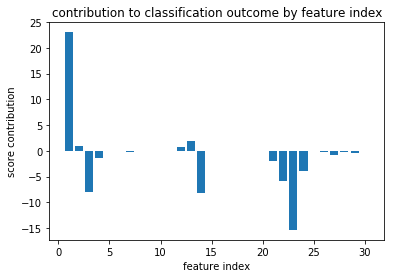

In [29]:
## sample we're using X[2] --> classified benign, lin_clf score~(-20)
lin_clf.predict(X[2].reshape(1,30))

contributions = np.multiply(X[2], lin_clf.coef_.reshape((30,)))
feature_number = np.arange(len(contributions)) +1

plt.bar(feature_number, contributions, align='center')
plt.xlabel('feature index')
plt.ylabel('score contribution')
plt.title('contribution to classification outcome by feature index')
plt.show()

In [30]:
abs_contributions = np.flip(np.sort(np.absolute(contributions)), axis=0)
feat_and_contrib = []
for contrib in abs_contributions:
   if contrib not in contributions:
       contrib = -contrib
       feat = np.where(contributions == contrib)
       feat_and_contrib.append((feat[0][0], contrib))
   else:
       feat = np.where(contributions == contrib)
       feat_and_contrib.append((feat[0][0], contrib))

# sorted by max abs value. each row a tuple:;(feature index, contrib)
feat_and_contrib 

[(0, 23.03642821175818),
 (22, -15.361434507461984),
 (13, -8.17419741167235),
 (2, -7.971403791688837),
 (21, -5.952261227506015),
 (23, -3.899808690509221),
 (20, -2.060109395997962),
 (12, 1.9908762276643706),
 (3, -1.4119572775485278),
 (1, 0.851353366209594),
 (11, 0.7770779873186814),
 (26, -0.7206001904757985),
 (28, -0.37144515835135544),
 (25, -0.2492249543608672),
 (27, -0.1846283801064009),
 (6, -0.13502660188475937),
 (8, -0.08608750960838098),
 (24, -0.07499126843804738),
 (7, -0.053639136625828386),
 (5, -0.039240187759707224),
 (10, -0.034165388528564974),
 (4, -0.03210355253414895),
 (29, -0.00559910298005004),
 (15, 0.0030534187401600106),
 (16, -0.002922041259955992),
 (17, -0.0013744681483459037),
 (18, -0.0011398301981465323),
 (9, -0.0010489588743769053),
 (14, -0.0003370302477815892),
 (19, 9.115747129398421e-05)]

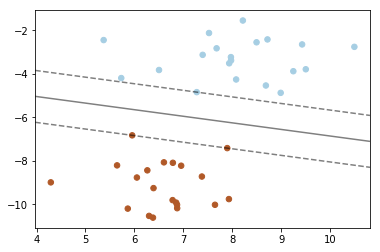

In [43]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()